## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Bank Customer Churn Prediction.csv') # Read the csv file

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
df.shape # check the number of rows and columns

(10000, 12)

In [68]:
df.columns # check the column names

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

## Exploratory Data Analysis

In [5]:
df.isnull().head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


## Checking for missing and duplicate values

In [6]:
df.isnull().sum() # no null values

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [57]:
df.duplicated().sum() # No duplicate values

0

In [7]:
df.dtypes # checking data types

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [8]:
df['churn'].value_counts() 

churn
0    7963
1    2037
Name: count, dtype: int64

In [9]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}

In [10]:
colors = df["churn"].map(lambda x: color_wheel.get(x + 1))

In [11]:
print(df['churn'].value_counts())

churn
0    7963
1    2037
Name: count, dtype: int64


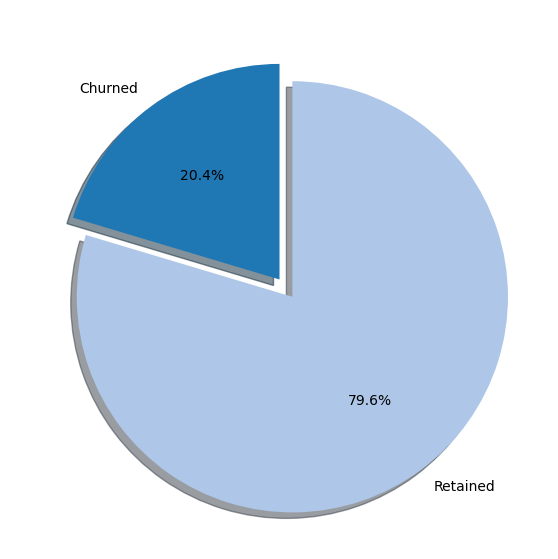

In [64]:
colors=sns.color_palette("tab20")
labels = 'Churned', 'Retained'
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
explode = (0, 0.1)
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, textprops={'fontsize': 10}, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.show()

In [70]:
df.describe().T # getting summary stats of the dataset

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
country,10000.0,9.968000e-01,0.706144,0.00,0.00,1.000000e+00,1.000000e+00,2.00
gender,10000.0,5.457000e-01,0.497932,0.00,0.00,1.000000e+00,1.000000e+00,1.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00


In [13]:
#Change value in country column

df['country'] = df['country'].replace(['Germany'],'0')
df['country'] = df['country'].replace(['France'],'1')
df['country'] = df['country'].replace(['Spain'],'2')

#Change value in gender column

df['gender'] = df['gender'].replace(['Female'],'0')
df['gender'] = df['gender'].replace(['Male'],'1')


In [14]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [15]:
#convert object data types column to integer
df['country'] = pd.to_numeric(df['country'])
df['gender'] = pd.to_numeric(df['gender'])
df.dtypes

customer_id           int64
credit_score          int64
country               int64
gender                int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [48]:
round(df[['credit_score','age','tenure','balance','estimated_salary']].mean(),2) # Average of numerical variables

credit_score           650.53
age                     38.92
tenure                   5.01
balance              76485.89
estimated_salary    100090.24
dtype: float64

In [16]:
#Remove customer_id column
df2 = df.drop('customer_id', axis=1)
df2.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


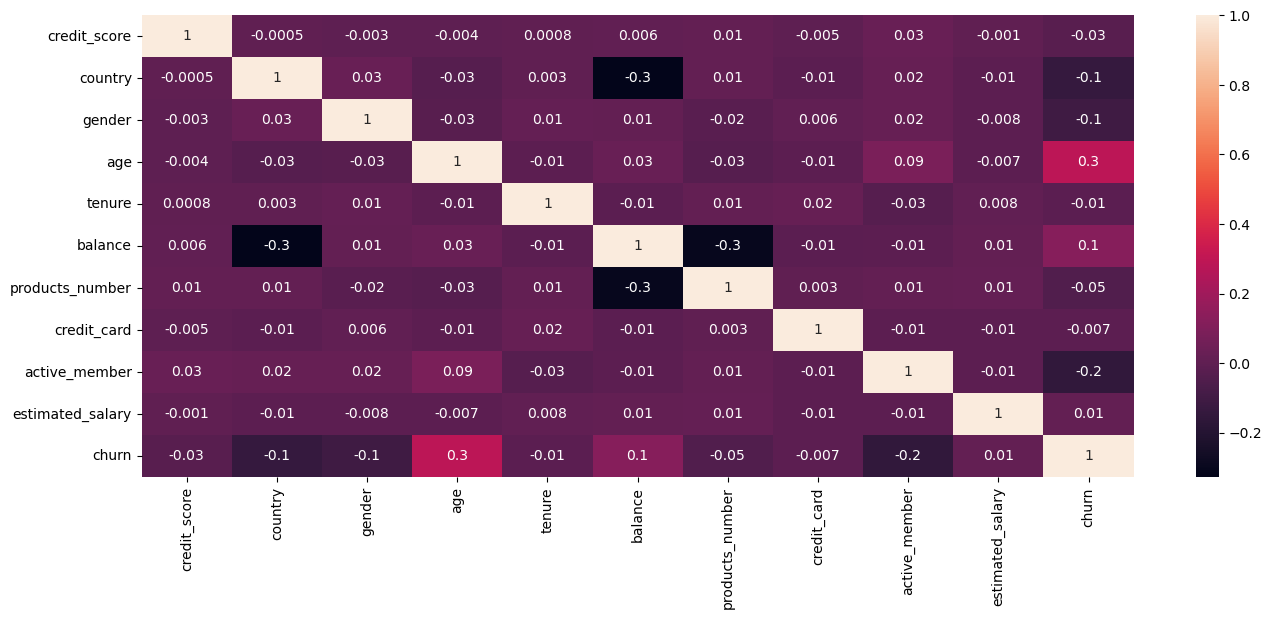

In [54]:
plt.figure(figsize = (16,6))
sns.heatmap(df2.corr(), fmt='.1g', annot = True)
plt.show()

# Low correlation between variables

## Build Machine Learning Model

In [18]:
X=df2.drop('churn', axis = 1)

In [19]:
Y= df2['churn']

In [20]:
# Train-Test Split : Test Size - 20%, Train Size - 80%

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=7)

## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [25]:
Y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(Y_test, Y_pred)*100, "%")

Accuracy Score : 78.10000000000001 %


## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [28]:
Y_pred = rfc.predict(X_test)
print("Accuracy Score: " , accuracy_score(Y_test, Y_pred)*100,'%')

Accuracy Score:  86.3 %


## XGBoost

In [29]:
pip install xgboost

In [30]:
from xgboost import XGBClassifier

In [32]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, Y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(Y_test, Y_pred)*100, "%")

Accuracy Score : 86.3 %


## Visualize Random Forest and XGBoost Algorithm 

## Random Forest

In [33]:
#importing classification report and confusion matrix from sklearn

from sklearn.metrics import classification_report, confusion_matrix

In [35]:
y_pred = rfc.predict(X_test)
print("Classification report - n", classification_report(Y_test,Y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1589
           1       0.77      0.47      0.59       411

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(0.5, 1.0, 'Accuracy Score: 0.863')

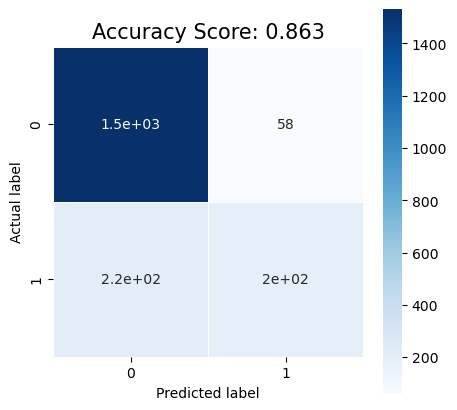

In [38]:
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, Y_test))
plt.title(all_sample_title, size = 15)


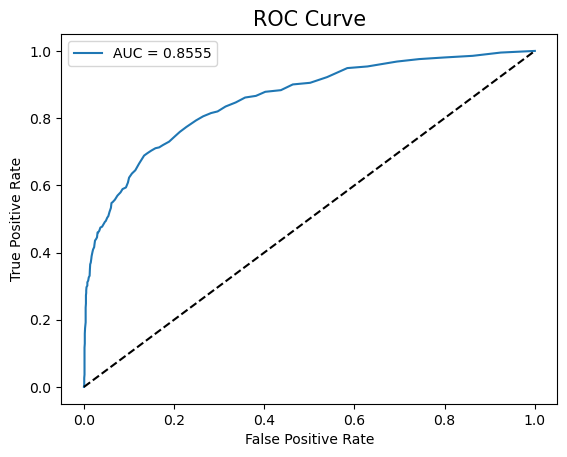

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
Y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(Y_test), columns=['Y_actual']), pd.DataFrame(Y_pred_proba, columns=['Y_pred_proba'])], axis=1)
df_actual_predicted.index = Y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['Y_actual'], df_actual_predicted['Y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['Y_actual'], df_actual_predicted['Y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

## XGBoost

Classification report - n               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1589
           1       0.77      0.47      0.59       411

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(0.5, 1.0, 'Accuracy Score: 0.8515')

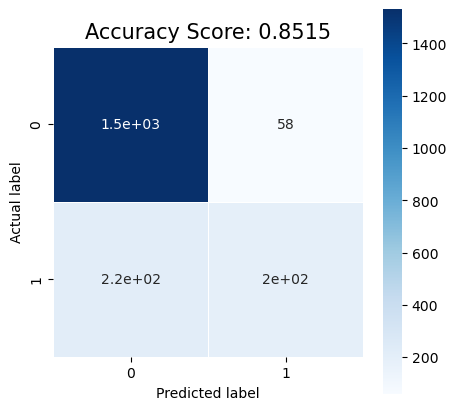

In [44]:
y_pred = xgb_model.predict(X_test)
print("Classification report - n", classification_report(Y_test,Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, Y_test))
plt.title(all_sample_title, size = 15)

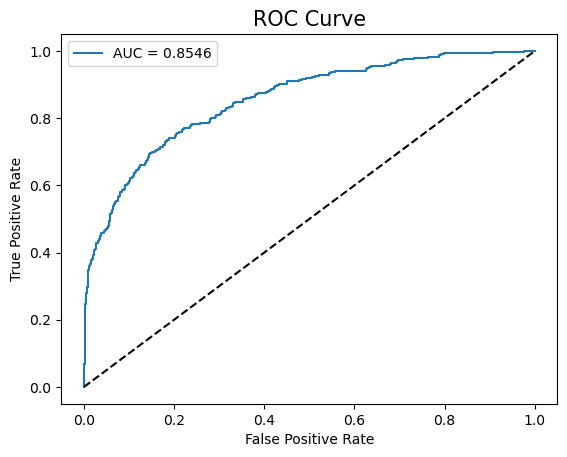

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
Y_pred_proba = xgb_model.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(Y_test), columns=['Y_actual']), pd.DataFrame(Y_pred_proba, columns=['Y_pred_proba'])], axis=1)
df_actual_predicted.index = Y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['Y_actual'], df_actual_predicted['Y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['Y_actual'], df_actual_predicted['Y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

## Conclusion:
XGBoost and Random Forest are the best algorithms to predict Bank Customer Churn since they have the highest accuracy (85.1% and 86.3%). Random Forest and XGBoost have perfect AUC Scores. They have 0.8555 and 0.8547 AUC Scores.